# Semestrální projekt z NLA1 2024/25
**Zadání č. 3**<br>
**Kučera Ondřej**

## Úkol 4
Chybu Čebyševovy metody odhadujeme jako
$$
\Vert e^k \Vert \leq \max_{λ\in<λ_1,λ_n>} |P_k(λ)| · \Vert e^0 \Vert \text{, kde } P_k(λ) = \prod_{i=1}^{k} (1 - ω_i^{(k)}· λ).
$$
Vykreslete s použitím programovacího jazyka Python polynomy $P_k(λ)$ pro $k = 1,...,5$,
přičemž parametry $ω^{(k)}$ volte jako optimální pro Čebyševovu metodu (viz přednášky).
Ilustrujte v grafu, že $ρ_k := \max|P_k(λ)|$ konverguje k nule.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def omega_opt(k, lam_1, lam_n) -> list:
    kosinusy = np.array([np.cos(np.pi * (2*i+1)/(2*k)) for i in range(k)])
    prevracene = (lam_1 + lam_n)/2 - (lam_n - lam_1)/2 * kosinusy
    return 1/prevracene

def polynom(lam, omega: list) -> float:
    return np.prod(1 - lam*omega)

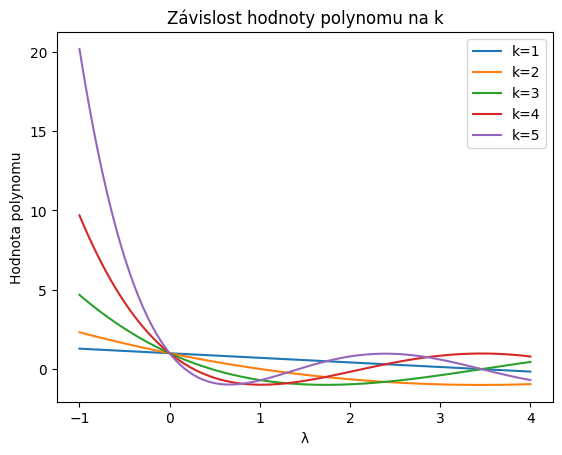

In [18]:
n = 5
A = np.random.rand(n, n)    # vytvoření náhodné matice
A = A @ A.T     # symetrická pozitivně definitní

w = np.linalg.eigvals(A)    # získání jejích vlastních čísel
w.sort()

omega = [omega_opt(k, w[0], w[-1]) for k in range(1, n+1)]   # předpočítání hodnot omega

# vykreslení polynomů pro každé k
plt.title("Závislost hodnoty polynomu na k")
plt.xlabel("λ")
plt.ylabel("Hodnota polynomu")

x = np.linspace(-1, 4, 100)

for k in range(n):
    y = [polynom(lam, omega[k]) for lam in x]
    plt.plot(x, y)

plt.legend([f"k={i+1}" for i in range(n)])

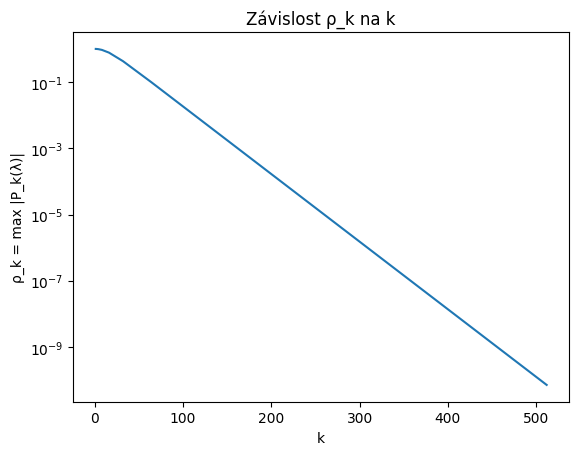

In [27]:
kx = np.logspace(0, 9, 10, base=2, dtype=np.int32)
max = []
for k in kx:
    max_k = 0
    omg = omega_opt(k, w[0], w[-1])
    for lam in w:
        p = polynom(lam, omg)
        if np.abs(p) > max_k:
            max_k = np.abs(p)
    max.append(max_k)

plt.title("Závislost ρ_k na k")
plt.xlabel("k")
plt.ylabel("ρ_k = max |P_k(λ)|")
plt.yscale("log")
plt.plot(kx, max)